##  Simplest form of PID:

   ***How long since we last calculated***


   unsigned long now = millis();

   double timeChange = (double)(now - lastTime);
  
   ***Compute all the working error variables***

   double error = Setpoint - Input;

   errSum += (error * timeChange);

   double dErr = (error - lastErr) / timeChange;
  
   ***Compute PID Output***

   Output = kp * error + ki * errSum + kd * dErr;
  
   ***Remember some variables for next time***

   lastErr = error;

   lastTime = now;

In [ ]:
import time

class PID:
    """PID Controller
    """

    def __init__(self, P, I, D, current_time=None):

        self.Kp = P
        self.Ki = I
        self.Kd = D

        self.sample_time = 0.00
        self.current_time = current_time if current_time is not None else time.time()
        self.last_time = self.current_time

        self.clear()

    def clear(self):
        """Clears PID computations and coefficients"""
        self.SetPoint = 0.0

        self.PTerm = 0.0
        self.ITerm = 0.0
        self.DTerm = 0.0
        self.last_error = 0.0

        # Windup Guard
        self.int_error = 0.0
        self.windup_guard = 20.0

        self.output = 0.0

    def update(self, feedback_value, current_time=None):
        """Calculates PID value for given reference feedback
        .. math::
            u(t) = K_p e(t) + K_i \int_{0}^{t} e(t)dt + K_d {de}/{dt}
        .. figure:: images/pid_1.png
           :align:   center
           Test PID with Kp=1.2, Ki=1, Kd=0.001 (test_pid.py)
        """
        error = self.SetPoint - feedback_value

        self.current_time = current_time if current_time is not None else time.time()
        delta_time = #your code here
        delta_error =#your code here

#new computation done after each sample_time

        if (delta_time >= self.sample_time):
            self.PTerm = #your code here
            self.ITerm =#your code here

            if (self.ITerm < -self.windup_guard):
                self.ITerm = -self.windup_guard
            elif (self.ITerm > self.windup_guard):
                self.ITerm = self.windup_guard

            self.DTerm = 0.0
            if delta_time > 0:
                self.DTerm = #your code here

            # Remember last time and last error for next calculation
            self.last_time = self.current_time
            self.last_error = error

#compiling the pid expression

            self.output = #your code here

    def setKp(self, proportional_gain):
        """Determines how aggressively the PID reacts to the current error with setting Proportional Gain"""
        self.Kp = proportional_gain

    def setKi(self, integral_gain):
        """Determines how aggressively the PID reacts to the current error with setting Integral Gain"""
        self.Ki = integral_gain

    def setKd(self, derivative_gain):
        """Determines how aggressively the PID reacts to the current error with setting Derivative Gain"""
        self.Kd = derivative_gain

    def setWindup(self, windup):
        """Integral windup, also known as integrator windup or reset windup,
        refers to the situation in a PID feedback controller where
        a large change in setpoint occurs (say a positive change)
        and the integral terms accumulates a significant error
        during the rise (windup), thus overshooting and continuing
        to increase as this accumulated error is unwound
        (offset by errors in the other direction).
        The specific problem is the excess overshooting.
        """
        self.windup_guard = windup

    def setSampleTime(self, sample_time):
        """PID that should be updated at a regular interval.
        Based on a pre-determined sampe time, the PID decides if it should compute or return immediately.
        """
        self.sample_time = sample_time

The class above defined the basic setup of the pid controller. We will now be creating objects of the class to utilize it.

In [ ]:

import time
import matplotlib.pyplot as plt
import numpy as np
#from scipy.interpolate import spline
from scipy.interpolate import BSpline, make_interp_spline #  Switched to BSpline

def test_pid(P,  I, D, L):
    """Self-test PID class
    .. note::
        ...
        for i in range(1, END):
            pid.update(feedback)
            output = pid.output
            if pid.SetPoint > 0:
                feedback += (output - (1/i))
            if i>9:
                pid.SetPoint = 1
            time.sleep(0.02)
        ---
    """
    pid = PID(P, I, D)

    pid.SetPoint=0.0 #target
    pid.setSampleTime(0.01) #pid performed after every "sampleTime" interval

    END = L
    feedback = 0

    feedback_list = []
    time_list = []
    setpoint_list = []

    for i in range(1, END):
        pid.update(feedback)
        output = pid.output
        if pid.SetPoint > 0:
            feedback += (output - (1/i))
        if i>9:
            pid.SetPoint = 1
        time.sleep(0.02)

        feedback_list.append(feedback)
        setpoint_list.append(pid.SetPoint)
        time_list.append(i)

    time_sm = np.array(time_list)
    time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)

    # feedback_smooth = spline(time_list, feedback_list, time_smooth)
    # Using make_interp_spline to create BSpline
    helper_x3 = make_interp_spline(time_list, feedback_list)
    feedback_smooth = helper_x3(time_smooth)

    plt.plot(time_smooth, feedback_smooth)
    plt.plot(time_list, setpoint_list)
    plt.xlim((0, L))
    plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
    plt.xlabel('time (s)')
    plt.ylabel('PID (PV)')
    plt.title('TEST PID')

    plt.ylim((1-0.5, 1+0.5))

    plt.grid(True)
    plt.show()



Try different vaues of P, I and D in the function below and observe its effect on convergence to the setpoint.

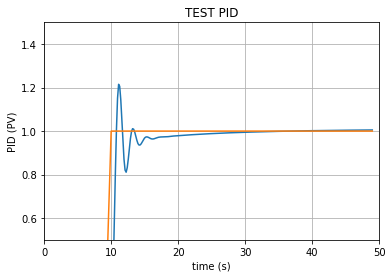

In [ ]:
if __name__ == "__main__":
    test_pid(1.2, 1, 0.001, L=50)